Project guide: https://www.dataquest.io/m/209/guided-project%3A-analyzing-movie-reviews

Solution by DataQuest: https://github.com/dataquestio/solutions/blob/master/Mission209Solution.ipynb

`fandango_score_comparison.csv` dataset will be used which is available at https://github.com/fivethirtyeight/data/tree/master/fandango.

<span style=color:red>Note</span>: This project does not strictly abide by statistical rules (e.g. I have not always tested assumptions required for each statistical methods). This project is more about demonstrating use of different techniques. Therefore, any conclusions or suggestions drawn here are not robust.



# 1. Movie Reviews

This project will compare normalised movie ratings (or scores) by different sites. Normalised scores range from 0 to 5, incrementing by 0.5.

First, let's see the data.

In [1]:
import pandas as pd

# read in dataset
movies = pd.read_csv("fandango_score_comparison.csv")

# display data
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


# 2. Compare scores
## 2.1. Fandango vs Metacritic

Following columns will be used.

* `Metacritic_norm_round` (The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star)
* `Fandango_Stars` (The number of stars the film had on its Fandango movie page)

### 2.1.1. Distribution and descriptive statistics

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
import seaborn as sns

# get scores from each site
mnr = movies["Metacritic_norm_round"]
fs = movies["Fandango_Stars"]

def dist_and_desc(data, data_label, xlim, ylim, bins, title):
    """
    Draw histogram of data within xlim and ylim
    
    data: data; pandas series
    data_label: name of data
    xlim: x-axis range; tuple
    ylim: y-axis range; tuple
    bins: number of bins
    title: plot title
    """
    # get mean
    data_mean = data.mean()

    # get median
    data_median = data.median()

    # get standard deviation
    data_sd = np.std(data)
    
    # draw histogram with gaussian kernel density estimate
    fig = plt.figure(figsize=(10, 5))
    hist = sns.distplot(data, bins)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    # add to histogram descriptive statistics 
    # (mean, median and standard deviations from the mean)
    plt.axvline(data_mean, color="r", linewidth=1, label="Mean: {}".format(round(data_mean, 3)))
    plt.axvline(data_median, color="g", linewidth=1, label="Median: {}".format(round(data_median, 3)))
    plt.axvline(data_mean + data_sd, color="k", linewidth=1, 
                label="1 SD ({})\nfrom mean".format(round(data_sd, 3)))
    plt.axvline(data_mean - data_sd, color="k", linewidth=1)
    
    # fill out-of-range area
    facecolor = "#ABB2B9"
    y = np.arange(0, 2)
    plt.fill_betweenx(y, 0, -1, facecolor=facecolor)
    plt.fill_betweenx(y, 5, 6, facecolor=facecolor)

    # add legend and other text
    plt.xlabel("Scores")
    plt.legend(loc="upper left")
    plt.title(title)
    plt.show()

    # check normality of distribution for each site (Shapiro-Wilk test)
    w_data, p_w_data = shapiro(data)
    yes_or_no = "" if p_w_data < 0.05 else "not "
    print("{}'s data is {}normally distributed".format(data_label, yes_or_no))
    print("(p = {} from Shapiro-Wilk test)".format(format(p_w_data, 'f')))
    print("\n\n\n")

xlim = (-1, 6)
ylim = (0, 1)
# histogram of Metacritic_norm_round
dist_and_desc(mnr, "Metacritic", xlim, ylim, len(mnr.unique()), "Metacritic")

# histogram of Fandango_Stars
dist_and_desc(fs, "Fandango", xlim, ylim, len(fs.unique()), "Fandango")

Metacritic's data is normally distributed
(p = 0.000012 from Shapiro-Wilk test)






Fandango's data is normally distributed
(p = 0.000000 from Shapiro-Wilk test)






Scores from both sites are normally distributed.

Metacritic's scores are widely distributed with no movie receiving 0 or 5. On the other hand, Fandango's scores are very generous, ranging from 3 to 5 and with greater mean and median values.

Fandango's scores are less diverse than those of Metacritic's as shown by standard deviations (0.539 vs 0.988) and ranges (3-5 vs 0.5-4.5).

Fandango's higher scores were noticed before and FiveThirtyEight wrote [this article](https://fivethirtyeight.com/features/fandango-movies-scores/). According to the article, Fandango often inappropriately rounded up their scores (e.g. 4.1 becomes 4.5 instead of 4.0), sometimes by as much as 0.5 (e.g. 4.5 becomes 5.0) and, at one occasion, by 1.

### 2.1.2. Relationship between the scores of both sites

Let's check how Metacritic and Fandango's data are related.

A scatter plot will be drawn. I will carry out linear regression to build a model, which will give best assumption of Fandango score for a given Metacritic score.

Then, using the linear model, Fandango's score will be predicted (or estimated) based on Metacritic's each existing score.

Pearson's r will also be calculated to see if the two sites' scores are correlated with each other.

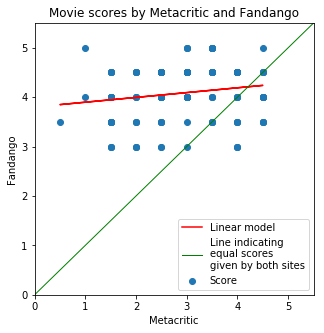

Pearson's r
0.17844919073895918 (p = 0.031161516228523815)


Spearman's rho
0.17067015611784112 (p = 0.03943431505443134)





Linear model = (0.09731107797392852 x MetacriticScore) + 3.799773918899418

Prediction (Metacritic score --> Estimated Fandango score)
0.5 --> 3.848429457886382
1.0 --> 3.8970849968733465
1.5 --> 3.9457405358603106
2.0 --> 3.994396074847275
2.5 --> 4.04305161383424
3.0 --> 4.091707152821203
3.5 --> 4.140362691808168
4.0 --> 4.189018230795132
4.5 --> 4.237673769782097


In [3]:
from scipy.stats import linregress, pearsonr, spearmanr

def scatter_fit_predict(data1, data2, data1_label, data2_label, xylim):
    """
    Scatter plot data1 and data2 with x and y axes ranging within xylim.
    Display Pearson's r and and its p value.
    Display linear model and use it to predict data2 value with data1 value.
    """

    # get linear regression - rvalue, pvalue and stderr are discarded
    slope, intercept, _, _, _ = linregress(data1, data2)
    lin_model = (slope * data1) + intercept

    # overlay linear model in scatter plot
    plt.figure(figsize=(5, 5))
    plt.scatter(data1, data2, label="Score")
    plt.plot(data1, lin_model, color="r", label="Linear model")
    plt.plot(xylim, xylim, color="g", linewidth=1, label="Line indicating\nequal scores\ngiven by both sites")
    plt.xlim(xylim)
    plt.ylim(xylim)
    plt.xlabel(data1_label)
    plt.ylabel(data2_label)
    plt.legend(loc="best")
    plt.title("Movie scores by {} and {}".format(data1_label, data2_label))
    plt.show()
    
    # get correlation coefficient (Pearson's r)
    corr_funcs = [pearsonr, spearmanr]
    corr_names = ["Pearson's r", "Spearman's rho"]
    for i, cf in enumerate(corr_funcs):
        r, p_r = cf(data1, data2)
        print(corr_names[i])
        print("{} (p = {})".format(r, p_r))
        print("\n")
    print("\n\n")

    
    # display linear model
    print("Linear model = ({} x {}Score) + {}".format(slope, data1_label, intercept))
    print()
    
    # display predicted data2 value based on data1 value, using linear model
    predict(data1, "Metacritic", "Fandango", slope, intercept)

def predict(data1, data1_label, data2_label, slope, intercept):
    """
    Input all possible values of into a linear model (= (slope * (data1's value)) + intercept).
    Return output which are all predicted values of data2.
    """

    print("Prediction ({} score --> Estimated {} score)".format(data1_label, data2_label))
    for data1_val in np.sort(data1.unique()):
        data2_val_estimated = (slope * data1_val) + intercept
        print("{} --> {}".format(data1_val, data2_val_estimated))

scatter_fit_predict(mnr, fs, "Metacritic", "Fandango", (0, 5.5))


### Regarding correlation coefficients

Note that, according to [this page](https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php), only **Separman's rho** seems to be valid here. I obtained both Pearson's r and Spearman's rho to demonstrate it. The page states that four assumptions should be met to use Pearson's r, but the linearity assumption is not met as can be seen in the scatter plot above. The table below shows all assumptions and whether they have been met.

||Assumption met?|
|---|---|
|interval or ratio data|Yes (scores are an interval data)|
|Linearity|No (the scatter plot does not resemble a line)|
|No significant outliers|Yes|
|Approximate normally distribution|Yes|

Anyway, the two site's scores clearly show only a weak correlation although significant.

### Regarding prediction

Note also that, [given the weak correlation, making a prediction with a linear model is meaningless.](http://www.dummies.com/education/math/statistics/using-linear-regression-to-predict-an-outcome/). Again, I made a prediction just to demonstrate it.


### 2.1.3. Movie preferences per site

In the scatter plot above, when a blue marker sits on the red line, it means that the movie(s) received same score from both sites. Anything below the line was favoured by Metacritic. Anything above the line was favoured by Fandango.

The plot clearly shows Fandango had been more generous with its scores. But, it does not show how many movies fall into each marker.

Following are a histogram and three tables. The histogram shows the distribution of score differences, where negative value means Fandango scores are higher than Metacritic scores, and vice versa.

The three tables will list a few movies that were scored higher by Metacritic, equally by both sites or higher by Fandango.

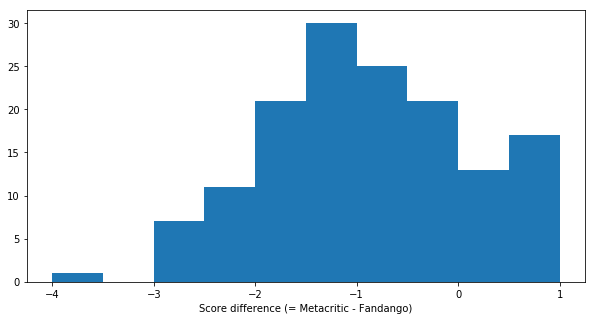





Top 5 movies scored higher by Metacritic
(sorted by Metacritic score)


,FILM,Metacritic_norm_round,Fandango_Stars,Metacritic_minus_Fandango
144,Gett: The Trial of Viviane Amsalem (2015),4.5,3.5,1.0
119,Phoenix (2015),4.5,3.5,1.0
143,"Two Days, One Night (2014)",4.5,3.5,1.0
69,Mr. Turner (2014),4.5,3.5,1.0
112,It Follows (2015),4.0,3.0,1.0


Total = 17



Top 5 movies scored equally by both sites
(sorted by Metacritic_minus_Fandango score)


,FILM,Metacritic_norm_round,Fandango_Stars,Metacritic_minus_Fandango
7,Top Five (2014),4.0,4.0,0.0
39,Maps to the Stars (2015),3.5,3.5,0.0
40,I'll See You In My Dreams (2015),4.0,4.0,0.0
66,The Gift (2015),4.0,4.0,0.0
67,Unfriended (2015),3.0,3.0,0.0


Total = 13



Top 5 movies scored higher by Fandango
(sorted by Metacritic score)


,FILM,Metacritic_norm_round,Fandango_Stars,Metacritic_minus_Fandango
141,Mr. Holmes (2015),3.5,4.0,-0.5
95,The Salt of the Earth (2015),4.0,4.5,-0.5
37,Welcome to Me (2015),3.5,4.0,-0.5
79,Poltergeist (2015),2.5,3.0,-0.5
82,Blackhat (2015),2.5,3.0,-0.5


Total = 116





In [4]:
def display_movie_comparision(df, data1, data2, data1_label, data2_label, diff_label, num_movies):
    """
    df: pandas data frame
    data1 and data2: data from sites; pandas series
    data1_label and data2_label: Labels for data1 and data2
    diff_label: column name
    
    Subtracts data2 from data1.
    Add the output to df with column label diff_label.
    
    Display num_movies movies in three separate groups where ...
    data1 > data2
    data1 == data2
    data1 < data2
    """
    
    # 1.1. get difference
    diff = data1 - data2
    diff.rename(diff_label, inplace=True)

    # 1.2. display difference
    plt.figure(figsize=(10, 5))
    plt.hist(diff)
    plt.xlabel("Score difference (= {} - {})".format(data1_label, data2_label))
    plt.show()
    print("\n\n\n")

    
    # 2. get subset (output: FILM, data1, data2, diff)
    subset = pd.concat([df["FILM"], data1, data2, diff], axis=1)
    
    # 3. make comparisons and display results
    comps = [diff > 0, diff == 0, diff < 0]
    
    for i, c in enumerate(comps):
        subset_c = subset[c]
        
        # when equal scores by both sites
        if i == 1:
            print("Top {} movies scored equally by both sites\n(sorted by {} score)"\
                  .format(num_movies, diff_label))
        else:
            # indicate site giving higher scores
            higher = data1_label if i == 0 else data2_label
            print("Top {} movies scored higher by {}\n(sorted by {} score)"\
                  .format(num_movies, higher, data1_label))
            
        display(subset_c.sort_values(by=diff_label, ascending=False).head(num_movies))
        print("Total = {}".format(subset_c.shape[0]))
        print("\n\n")
        
    
display_movie_comparision(movies, mnr, fs, "Metacritic", "Fandango", "Metacritic_minus_Fandango", 5)

Fandango favoured 116 movies while only 17 movies were favoured by Metacritic and 13 movies received same scores.

Not surprisingly, the difference seems more extreme among the movies favoured by Fandango than those preferred by Metacritic.

# 4. TODO

These are additional tasks suggested by DataQuest. I will try to come back to these when there is less time constraint.

*   Explore the other rating services, IMDB and RottenTomatoes.
    *   See how they differ from each other.
    *   See how they differ from Fandango.
*   See how user scores differ from critic scores.
*   Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
*   Dig more into why certain movies had their scores inflated more than others.